In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
def loss(x, y, w):
    y_pred = x*w[1] + w[0]
    loss = ((y - y_pred)**2).mean()
    return loss

In [72]:
# ошибка здесь!
def gradient(x, y, w):
    y_pred = x*w[1] + w[0]
    derivative_w0 = (-2*(y - y_pred)).mean()
    derivative_w1 = (-2*x*(y - y_pred)).mean()
    gradient = np.array([derivative_w0, derivative_w1])
    return gradient

In [73]:
def step(x, y, w, lr):
    new_w = w - lr*gradient(x, y, w)
    return new_w

In [74]:
def lin_reg(x, y, lr, epochs):
    w_act = np.random.randint(-2, 2, size=2)
    print(f"actual weights: {w_act}")
    loss_act = None
    for epoch in range(epochs):
        w_act = step(x, y, w_act, lr)
        loss_act = loss(x, y, w_act)
        print(f"epoch: {epoch+1}")
        print(f"new weights: {w_act}")
        print(f"actual loss: {loss_act}")
    return w_act, loss_act

# y = 12x + 5

In [75]:
x = np.linspace(-5, 5, 200)
y = -31*x + 25 + np.random.normal(0, 2, size=200)

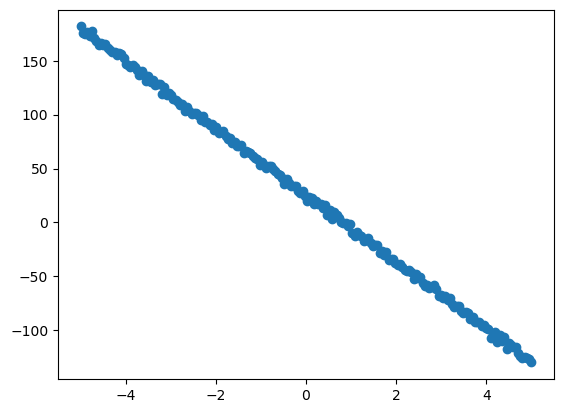

In [76]:
plt.scatter(x, y)

In [77]:
lin_reg(x, y, lr=0.05, epochs=100)

actual weights: [-2  0]
epoch: 1
new weights: [  0.71655462 -26.04810611]
actual loss: 804.0269156463308
epoch: 2
new weights: [  3.16145378 -30.17129879]
actual loss: 493.53594696382703
epoch: 3
new weights: [  5.36186303 -30.82396497]
actual loss: 396.6077204751925
epoch: 4
new weights: [  7.34223135 -30.92727645]
actual loss: 321.9687780275441
epoch: 5
new weights: [  9.12456284 -30.94362977]
actual loss: 261.60827527196165
epoch: 6
new weights: [ 10.72866117 -30.94621837]
actual loss: 212.71869950788644
epoch: 7
new weights: [ 12.17234968 -30.94662812]
actual loss: 173.11820406229734
epoch: 8
new weights: [ 13.47166933 -30.94669298]
actual loss: 141.04180427787597
epoch: 9
new weights: [ 14.64105702 -30.94670324]
actual loss: 115.05992049074307
epoch: 10
new weights: [ 15.69350594 -30.94670487]
actual loss: 94.01459462412375
epoch: 11
new weights: [ 16.64070997 -30.94670513]
actual loss: 76.9678806721862
epoch: 12
new weights: [ 17.4931936  -30.94670517]
actual loss: 63.16004237111

(array([ 25.16482467, -30.94670518]), np.float64(4.295048029307423))

In [78]:
# -31*x + 25
x_valid = np.array([10, 11, 12])
#y_valid = x_valid * (-31) + 25
y_valid = np.array([-289, -310, -341])

In [79]:
y_pred = x_valid * (-31.10631175) + 25.16308573  # y_pred = LR.predict(x_valid)

In [80]:
y_pred

array([-285.90003177, -317.00634352, -348.11265527])

In [81]:
MSE = ((y_valid - y_pred)**2).mean()
MAPE = (((y_valid - y_pred)/y_valid)*100).mean()
MAPE

np.float64(-1.0910933686484254)

In [82]:
y_valid

array([-289, -310, -341])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import StandardScaler

In [84]:
path = 'SOLYaNKA.csv' # путь к файлу датасета
df = pd.read_csv(path)

In [85]:
df.head(5)

,id_listing,number_of_rooms,metro_on_foot,area_m2,building_info,price,renovation,bathroom,price_per_m2,price_per_room,metro_category,is_walk_distance,is_small_area,is_large_area,area_per_room,price_category,building_renovation,metro_building
0,271271157,4,9,200,2,500000,3,0,2500.000000,125000.0,1,1,0,1,50.0,3,23,12
1,271634126,4,8,198,3,500000,3,1,2525.252525,125000.0,1,1,0,1,49.5,3,33,13
2,271173086,4,7,200,1,500000,2,1,2500.000000,125000.0,1,1,0,1,50.0,3,12,11
3,272197456,4,3,170,1,400000,2,1,2352.941176,100000.0,0,1,0,1,42.5,3,12,1
4,273614615,2,7,58,0,225000,2,0,3879.310345,112500.0,1,1,0,0,29.0,3,2,10


In [86]:
X = df.copy()
X = X.drop(columns=['id_listing', 'price'])
y = df[['price']].copy()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [88]:
LR = LinearRegression()

In [89]:
LR.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = LR.predict(X_test)

In [91]:
MAPE = abs(((y_test - y_pred)/y_test)).mean()*100
MAPE

price    22.892903
dtype: float64

In [92]:
mape_score = mape(y_test, y_pred)
mape_score

0.2289290266962732

In [93]:
LR.coef_

array([[ 2.55203278e+04,  2.66379864e+01,  1.01449516e+03,
         6.53907452e+01, -9.67240291e+02,  1.86082680e+04,
        -1.02737402e+01,  3.47197689e+00,  6.06675064e+00,
         1.93554269e+03,  1.65716877e+03, -9.26081650e+03,
        -2.68973385e+03, -1.67546804e+04, -3.13332839e+02,
         1.26058252e+02]])

In [94]:
std = StandardScaler()

In [95]:
X_std = std.fit_transform(X)
print(X_std)

[[ 1.98568725 -0.27117336  2.8462044  ...  1.91000479  1.36737206
  -0.30158944]
 [ 1.98568725 -0.34125151  2.80449664 ...  1.91000479  2.37296203
  -0.21644102]
 [ 1.98568725 -0.41132966  2.8462044  ...  1.91000479  0.2612231
  -0.38673786]
 ...
 [-0.01535992 -0.48140781 -0.4278548  ... -0.15387326  0.3617821
  -0.38673786]
 [-0.01535992 -0.13101706 -0.24016988 ... -0.15387326  1.26681307
   0.54989478]
 [-0.01535992 -0.20109521  0.55227757 ... -0.15387326 -0.94548486
  -0.47188628]]


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.25, random_state=23)

In [97]:
LR_std = LinearRegression()
LR_std.fit(X_train, y_train)

LinearRegression()

In [98]:
y_std_pred = LR_std.predict(X_test)

In [99]:
mape_score = mape(y_test, y_std_pred)
mape_score

0.2206792593447426

In [100]:
df.head(5)

,id_listing,number_of_rooms,metro_on_foot,area_m2,building_info,price,renovation,bathroom,price_per_m2,price_per_room,metro_category,is_walk_distance,is_small_area,is_large_area,area_per_room,price_category,building_renovation,metro_building
0,271271157,4,9,200,2,500000,3,0,2500.000000,125000.0,1,1,0,1,50.0,3,23,12
1,271634126,4,8,198,3,500000,3,1,2525.252525,125000.0,1,1,0,1,49.5,3,33,13
2,271173086,4,7,200,1,500000,2,1,2500.000000,125000.0,1,1,0,1,50.0,3,12,11
3,272197456,4,3,170,1,400000,2,1,2352.941176,100000.0,0,1,0,1,42.5,3,12,1
4,273614615,2,7,58,0,225000,2,0,3879.310345,112500.0,1,1,0,0,29.0,3,2,10


In [101]:
std = StandardScaler()

In [102]:
df[['area_m2', 'area_per_room']] = std.fit_transform(df[['area_m2', 'area_per_room']])

In [103]:
df.head(5)

,id_listing,number_of_rooms,metro_on_foot,area_m2,building_info,price,renovation,bathroom,price_per_m2,price_per_room,metro_category,is_walk_distance,is_small_area,is_large_area,area_per_room,price_category,building_renovation,metro_building
0,271271157,4,9,2.846204,2,500000,3,0,2500.000000,125000.0,1,1,0,1,1.803701,3,23,12
1,271634126,4,8,2.804497,3,500000,3,1,2525.252525,125000.0,1,1,0,1,1.754579,3,33,13
2,271173086,4,7,2.846204,1,500000,2,1,2500.000000,125000.0,1,1,0,1,1.803701,3,12,11
3,272197456,4,3,2.220588,1,400000,2,1,2352.941176,100000.0,0,1,0,1,1.066880,3,12,1
4,273614615,2,7,-0.115047,0,225000,2,0,3879.310345,112500.0,1,1,0,0,-0.259397,3,2,10
